## Random Sample Imputation

Aim: Random Sample Imputation consists of taking observation from the dataset and we use this replace the NAN values

When should it be used?                                 
it assume that the data are missing completely at random(MCAR)

In [76]:
import pandas as pd
df = pd.read_csv('titanic_data.csv', usecols=['age','fare','survived'])
df

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500
...,...,...,...
1304,0,14.5000,14.4542
1305,0,NaN,14.4542
1306,0,26.5000,7.2250
1307,0,27.0000,7.2250


In [77]:
df.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [78]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state = 0)

1203    40.0
919     18.5
703     21.0
853     25.0
722     24.0
        ... 
128     47.0
712     24.0
39      48.0
1158    41.0
180     39.0
Name: age, Length: 263, dtype: float64

In [79]:
df[df['age'].isnull()].index

Int64Index([  15,   37,   40,   46,   59,   69,   70,   74,   80,  106,
            ...
            1282, 1283, 1284, 1291, 1292, 1293, 1297, 1302, 1303, 1305],
           dtype='int64', length=263)

In [80]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## it will have the random sample to fill na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas needs to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [81]:
median=df.age.median()
median

28.0

In [82]:
impute_nan(df,"age",median)

In [83]:
df.head()

,survived,age,fare,age_median,age_random
0,1,29.0000,211.3375,29.0000,29.0000
1,1,0.9167,151.5500,0.9167,0.9167
2,0,2.0000,151.5500,2.0000,2.0000
3,0,30.0000,151.5500,30.0000,30.0000
4,0,25.0000,151.5500,25.0000,25.0000


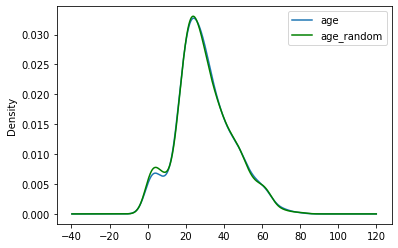

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_random.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy to implement
2. there is less distortion in variance

#### Disadvantages
1. Every situation randomness wont work

## Capturing NAN values with a new features 

It works well if the data are not missing completely at random

In [85]:
df = pd.read_csv("titanic_data.csv",usecols = ['age','fare','survived'])
df.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [86]:
import numpy as np
df['age_NAN']=np.where(df['age'].isnull(),1,0)
df.head()

,survived,age,fare,age_NAN
0,1,29.0000,211.3375,0
1,1,0.9167,151.5500,0
2,0,2.0000,151.5500,0
3,0,30.0000,151.5500,0
4,0,25.0000,151.5500,0


In [87]:
df.age.median()

28.0

In [88]:
# replace nan values with median
df['age'].fillna(df.age.median(),inplace=True)

In [89]:
df.head(10)

,survived,age,fare,age_NAN
0,1,29.0000,211.3375,0
1,1,0.9167,151.5500,0
2,0,2.0000,151.5500,0
3,0,30.0000,151.5500,0
4,0,25.0000,151.5500,0
5,1,48.0000,26.5500,0
6,1,63.0000,77.9583,0
7,0,39.0000,0.0000,0
8,1,53.0000,51.4792,0
9,0,71.0000,49.5042,0


#### Advantages
1. easy to implement
2. captures the importance of missing values

#### Disadvantages
1. creating additional features(curse of dimensionality)

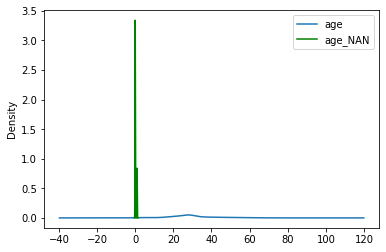

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_NAN.plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## End of distribution imputation

In [91]:
df = pd.read_csv("titanic_data.csv",usecols = ['age','fare','survived'])
df.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


<AxesSubplot:>

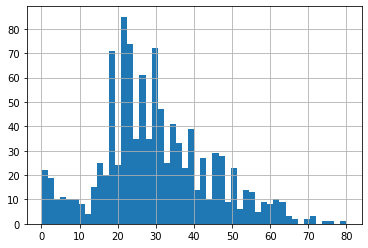

In [92]:
df.age.hist(bins=50)

In [93]:
# standard deviation formula to get right end of data from this hist graph
extreme = df.age.mean()+3*df.age.std()

C:\python37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

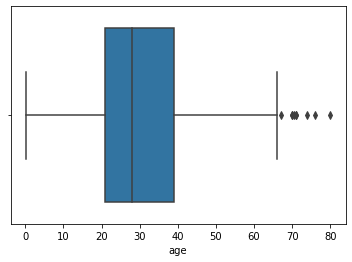

In [94]:
import seaborn as sns
sns.boxplot('age',data=df)

In [95]:
## for replace my nan values to outliers 
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_of_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [96]:
impute_nan(df,'age',df.age.median(),extreme)

In [97]:
df.head()

,survived,age,fare,age_end_of_distribution
0,1,29.0000,211.3375,29.0000
1,1,0.9167,151.5500,0.9167
2,0,2.0000,151.5500,2.0000
3,0,30.0000,151.5500,30.0000
4,0,25.0000,151.5500,25.0000


<AxesSubplot:>

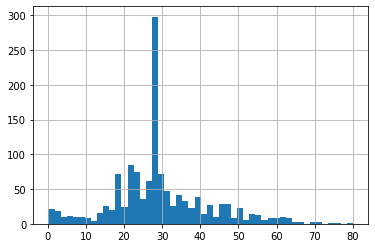

In [98]:
# simple age feature
df['age'].hist(bins=50)

<AxesSubplot:>

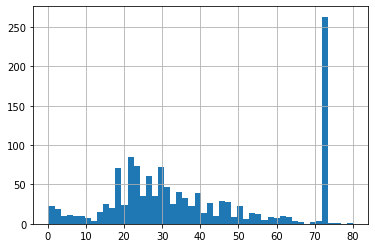

In [100]:
#after end distribution
df['age_end_of_distribution'].hist(bins=50)

C:\python37\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_of_distribution'>

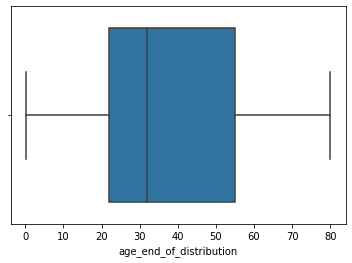

In [101]:
sns.boxplot('age_end_of_distribution',data=df)